In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [21]:
without_nudges_inv_file = open("../logs/without_nudges_feats.json", "r", encoding="utf-8")
without_nudges_invs = json.load(without_nudges_inv_file)
without_nudges_inv_file.close()

with_nudges_inv_file = open("../logs/with_nudges_feats.json", "r", encoding="utf-8")
with_nudges_invs = json.load(with_nudges_inv_file)
with_nudges_inv_file.close()

m_prompt_inv_file = open("../logs/mp_feats.json", "r", encoding="utf-8")
m_prompt_invs = json.load(m_prompt_inv_file)
m_prompt_inv_file.close()

# with_nudges_new = open("../logs/final_rechecked_re_filtered.json.invariant.stats.json", "r", encoding="utf-8")
# with_nudges_new_invs = json.load(with_nudges_new)
# with_nudges_new.close()

In [22]:
def get_stats(feat):
    num_vars_wn = {}
    num_vars_won = {}
    num_vars_mp = {}

    for inv in with_nudges_invs["logs"]:
        if inv["stats"][feat] not in num_vars_wn:
            num_vars_wn[inv["stats"][feat]] = 0
        num_vars_wn[inv["stats"][feat]] += 1

    for inv in without_nudges_invs["logs"]:
        if inv["stats"][feat] not in num_vars_won:
            num_vars_won[inv["stats"][feat]] = 0
        num_vars_won[inv["stats"][feat]] += 1

    for inv in m_prompt_invs["logs"]:
        if inv["stats"][feat] not in num_vars_mp:
            num_vars_mp[inv["stats"][feat]] = 0
        num_vars_mp[inv["stats"][feat]] += 1
    
    return num_vars_mp, num_vars_won, num_vars_wn

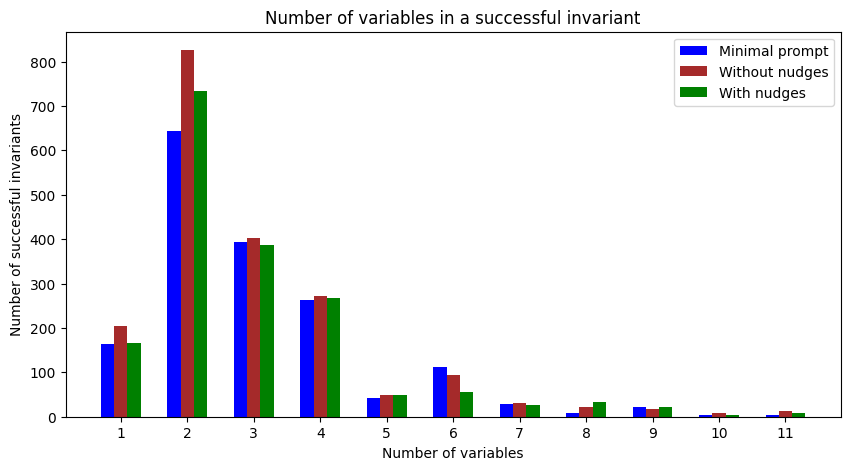

In [23]:
num_vars_mp, num_vars_won, num_vars_wn = get_stats("num_variables")
_ = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
x = np.arange(1, max(len(num_vars_wn.keys()), len(num_vars_won.keys()), len(num_vars_mp.keys())))
y1 = [num_vars_wn[i] if i in num_vars_wn else 0 for i in x]
y2 = [num_vars_won[i] if i in num_vars_won else 0 for i in x]
y3 = [num_vars_mp[i] if i in num_vars_mp else 0 for i in x]
ax.bar(x - 0.2, y3, width=0.2, color='blue', label="Minimal prompt")
ax.bar(x, y2, width=0.2, color='brown', label="Without nudges")
ax.bar(x + 0.2, y1,  width=0.2, color='green', label="With nudges")
plt.xlabel("Number of variables")
plt.ylabel("Number of successful invariants")
plt.title("Number of variables in a successful invariant")
plt.xticks(x)
plt.legend()
plt.show()

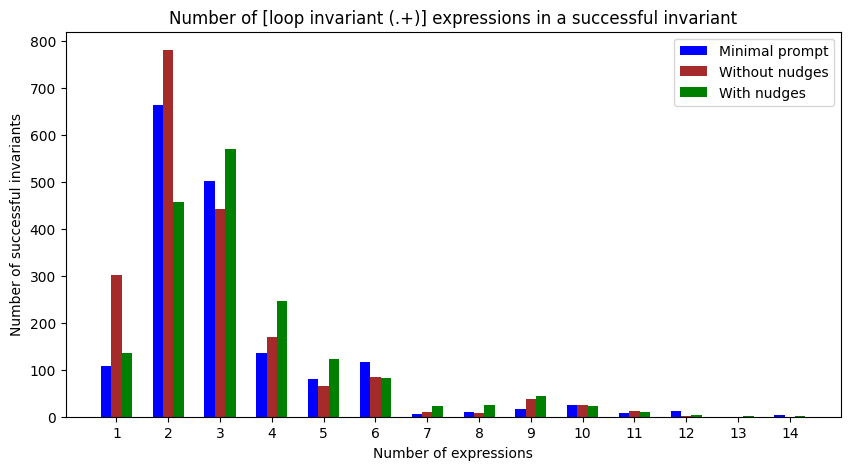

In [12]:
num_conjuncts_mp, num_conjuncts_won, num_conjuncts_wn = get_stats("num_conjuncts_in_completion")
_ = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
x = np.arange(1, max(len(num_conjuncts_wn.keys()), len(num_conjuncts_won.keys()), len(num_conjuncts_mp.keys())))
y1 = [num_conjuncts_wn[i] if i in num_conjuncts_wn else 0 for i in x]
y2 = [num_conjuncts_won[i] if i in num_conjuncts_won else 0 for i in x]
y3 = [num_conjuncts_mp[i] if i in num_conjuncts_mp else 0 for i in x]
ax.bar(x - 0.2, y3, width=0.2, color='blue', label="Minimal prompt")
ax.bar(x, y2, width=0.2, color='brown', label="Without nudges")
ax.bar(x + 0.2, y1,  width=0.2, color='green', label="With nudges")
plt.xlabel("Number of expressions")
plt.ylabel("Number of successful invariants")
plt.title("Number of [loop invariant (.+)] expressions in a successful invariant")
plt.xticks(x)
plt.legend()
plt.show()

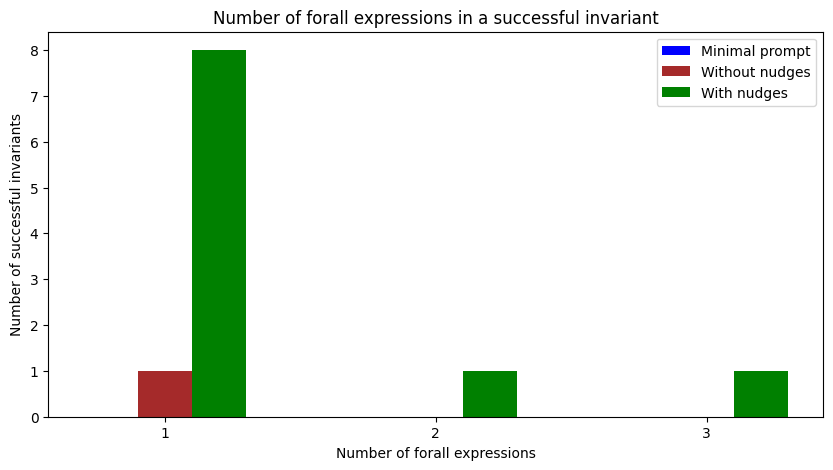

In [13]:
num_forall_mp, num_forall_won, num_forall_wn = get_stats("num_forall")
_ = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
x = np.arange(1, max(len(num_forall_wn.keys()), len(num_forall_won.keys()), len(num_forall_mp.keys())))
y1 = [num_forall_wn[i] if i in num_forall_wn else 0 for i in x]
y2 = [num_forall_won[i] if i in num_forall_won else 0 for i in x]
y3 = [num_forall_mp[i] if i in num_forall_mp else 0 for i in x]
ax.bar(x - 0.2, y3, width=0.2, color='blue', label="Minimal prompt")
ax.bar(x, y2, width=0.2, color='brown', label="Without nudges")
ax.bar(x + 0.2, y1,  width=0.2, color='green', label="With nudges")
plt.xlabel("Number of forall expressions")
plt.ylabel("Number of successful invariants")
plt.title("Number of forall expressions in a successful invariant")
plt.xticks(x)
plt.legend()
plt.show()

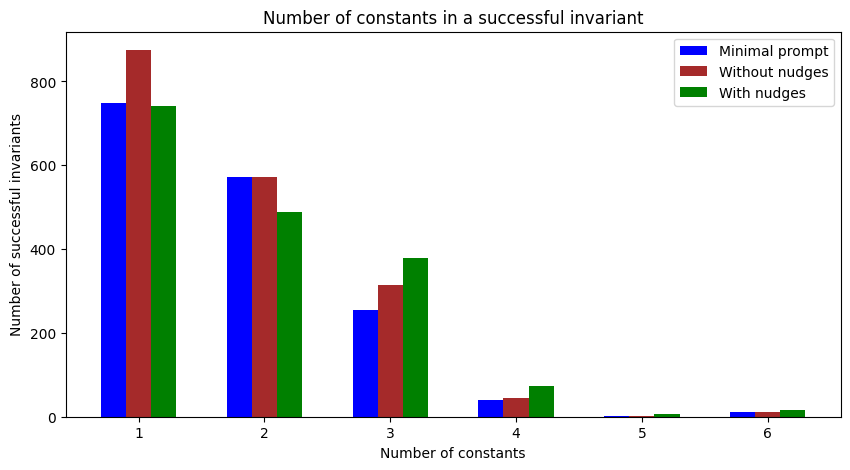

In [14]:
num_consts_mp, num_consts_won, num_consts_wn = get_stats("num_constants")
_ = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
x = np.arange(1, max(len(num_consts_wn.keys()), len(num_consts_won.keys()), len(num_consts_mp.keys())))
y1 = [num_consts_wn[i] if i in num_consts_wn else 0 for i in x]
y2 = [num_consts_won[i] if i in num_consts_won else 0 for i in x]
y3 = [num_consts_mp[i] if i in num_consts_mp else 0 for i in x]
ax.bar(x - 0.2, y3, width=0.2, color='blue', label="Minimal prompt")
ax.bar(x, y2, width=0.2, color='brown', label="Without nudges")
ax.bar(x + 0.2, y1,  width=0.2, color='green', label="With nudges")
plt.xlabel("Number of constants")
plt.ylabel("Number of successful invariants")
plt.title("Number of constants in a successful invariant")
plt.xticks(x)
plt.legend()
plt.show()

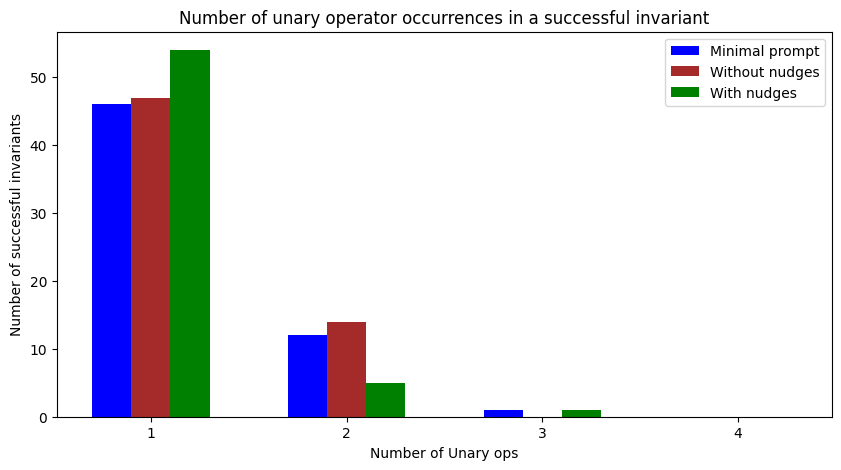

In [15]:
num_unops_mp, num_unops_won, num_unops_wn = get_stats("num_unary_ops")
_ = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
x = np.arange(1, max(len(num_unops_wn.keys()), len(num_unops_won.keys()), len(num_unops_mp.keys())))
y1 = [num_unops_wn[i] if i in num_unops_wn else 0 for i in x]
y2 = [num_unops_won[i] if i in num_unops_won else 0 for i in x]
y3 = [num_unops_mp[i] if i in num_unops_mp else 0 for i in x]
ax.bar(x - 0.2, y3, width=0.2, color='blue', label="Minimal prompt")
ax.bar(x, y2, width=0.2, color='brown', label="Without nudges")
ax.bar(x + 0.2, y1,  width=0.2, color='green', label="With nudges")
plt.xlabel("Number of Unary ops")
plt.ylabel("Number of successful invariants")
plt.title("Number of unary operator occurrences in a successful invariant")
plt.xticks(x)
plt.legend()
plt.show()

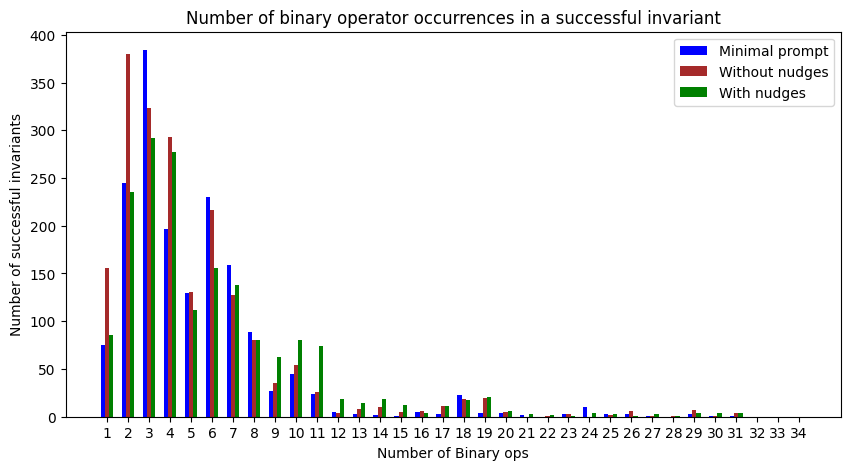

In [16]:
num_binops_mp, num_binops_won, num_binops_wn = get_stats("num_binary_ops")
_ = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
x = np.arange(1, max(len(num_binops_wn.keys()), len(num_binops_won.keys()), len(num_binops_mp.keys())))
y1 = [num_binops_wn[i] if i in num_binops_wn else 0 for i in x]
y2 = [num_binops_won[i] if i in num_binops_won else 0 for i in x]
y3 = [num_binops_mp[i] if i in num_binops_mp else 0 for i in x]
ax.bar(x - 0.2, y3, width=0.2, color='blue', label="Minimal prompt")
ax.bar(x, y2, width=0.2, color='brown', label="Without nudges")
ax.bar(x + 0.2, y1,  width=0.2, color='green', label="With nudges")
plt.xlabel("Number of Binary ops")
plt.ylabel("Number of successful invariants")
plt.title("Number of binary operator occurrences in a successful invariant")
plt.xticks(x)
plt.legend()
plt.show()

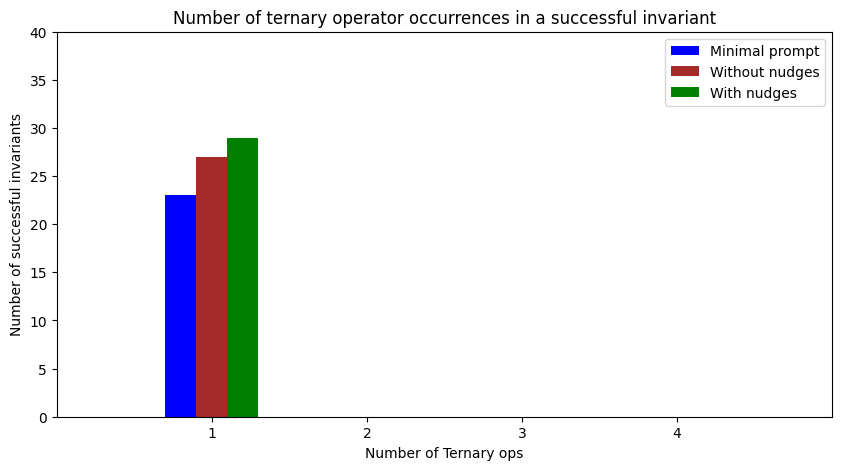

In [17]:
num_ternops_mp, num_ternops_won, num_ternops_wn = get_stats("num_ternary_ops")
_ = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
x = np.arange(1, max(len(num_ternops_wn.keys()), len(num_ternops_won.keys()), len(num_ternops_mp.keys())))
y1 = [num_ternops_wn[i] if i in num_ternops_wn else 0 for i in x]
y2 = [num_ternops_won[i] if i in num_ternops_won else 0 for i in x]
y3 = [num_ternops_mp[i] if i in num_ternops_mp else 0 for i in x]
ax.bar(x - 0.2, y3, width=0.2, color='blue', label="Minimal prompt")
ax.bar(x, y2, width=0.2, color='brown', label="Without nudges")
ax.bar(x + 0.2, y1,  width=0.2, color='green', label="With nudges")
plt.xlabel("Number of Ternary ops")
plt.ylabel("Number of successful invariants")
plt.title("Number of ternary operator occurrences in a successful invariant")
plt.xticks(x)
plt.ylim(0, 40)
plt.xlim(0, 5)
plt.xticks([1, 2, 3, 4])
plt.legend()
plt.show()

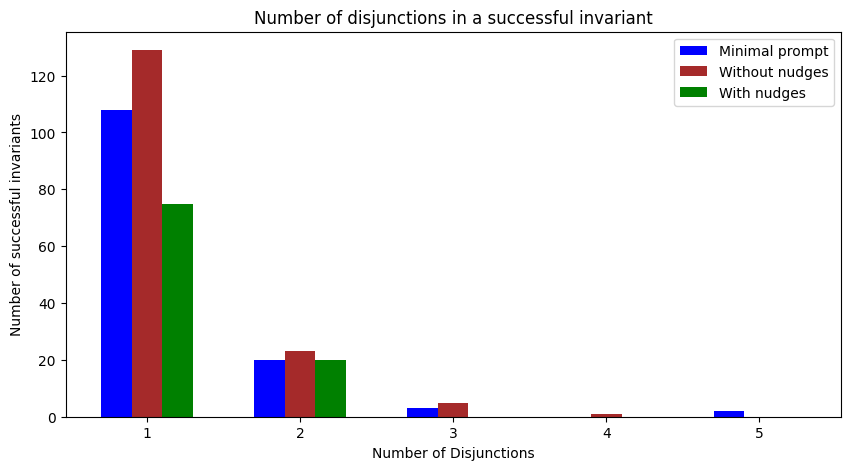

In [24]:
num_unops_mp, num_unops_won, num_unops_wn = get_stats("num_disjunctions")
_ = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
x = np.arange(1, max(len(num_unops_wn.keys()), len(num_unops_won.keys()), len(num_unops_mp.keys())))
y1 = [num_unops_wn[i] if i in num_unops_wn else 0 for i in x]
y2 = [num_unops_won[i] if i in num_unops_won else 0 for i in x]
y3 = [num_unops_mp[i] if i in num_unops_mp else 0 for i in x]
ax.bar(x - 0.2, y3, width=0.2, color='blue', label="Minimal prompt")
ax.bar(x, y2, width=0.2, color='brown', label="Without nudges")
ax.bar(x + 0.2, y1,  width=0.2, color='green', label="With nudges")
plt.xlabel("Number of Disjunctions")
plt.ylabel("Number of successful invariants")
plt.title("Number of disjunctions in a successful invariant")
plt.xticks(x)
plt.legend()
plt.show()

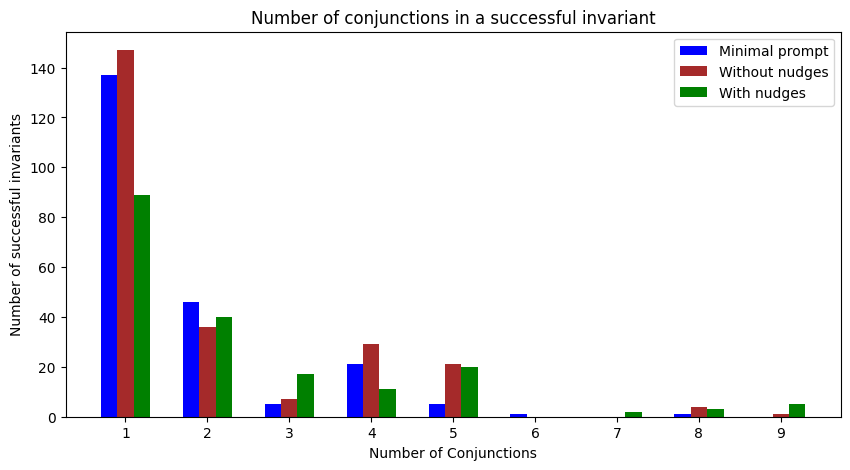

In [26]:
num_unops_mp, num_unops_won, num_unops_wn = get_stats("num_conjunctions")
_ = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
x = np.arange(1, max(len(num_unops_wn.keys()), len(num_unops_won.keys()), len(num_unops_mp.keys())))
y1 = [num_unops_wn[i] if i in num_unops_wn else 0 for i in x]
y2 = [num_unops_won[i] if i in num_unops_won else 0 for i in x]
y3 = [num_unops_mp[i] if i in num_unops_mp else 0 for i in x]
ax.bar(x - 0.2, y3, width=0.2, color='blue', label="Minimal prompt")
ax.bar(x, y2, width=0.2, color='brown', label="Without nudges")
ax.bar(x + 0.2, y1,  width=0.2, color='green', label="With nudges")
plt.xlabel("Number of Conjunctions")
plt.ylabel("Number of successful invariants")
plt.title("Number of conjunctions in a successful invariant")
plt.xticks(x)
plt.legend()
plt.show()